In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Pearson correlation coefficient: -0.700
P-value: 0.0241


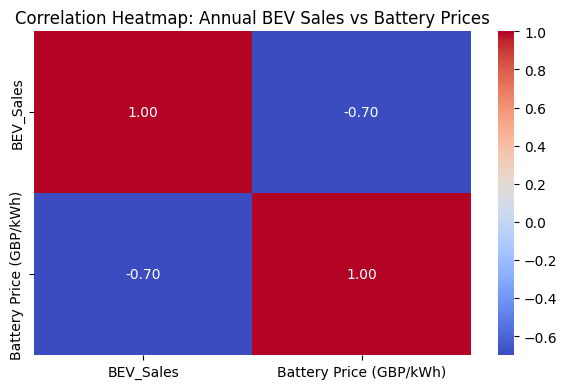

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


df = pd.read_csv("BEV_Sales_vs_Battery_Prices_Annual.csv")


r, p_value = pearsonr(df['BEV_Sales'], df['Battery Price (GBP/kWh)'])
print(f"Pearson correlation coefficient: {r:.3f}")
print(f"P-value: {p_value:.4f}")


plt.figure(figsize=(6, 4))
corr_matrix = df[['BEV_Sales', 'Battery Price (GBP/kWh)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Annual BEV Sales vs Battery Prices")
plt.tight_layout()
plt.show()


In [3]:
import plotly.graph_objects as go

# Linear regression
slope = r * df['BEV_Sales'].std() / df['Battery Price (GBP/kWh)'].std()
intercept = df['BEV_Sales'].mean() - slope * df['Battery Price (GBP/kWh)'].mean()
regression_line = slope * df['Battery Price (GBP/kWh)'] + intercept

fig = go.Figure()


fig.add_trace(go.Scatter(
    x=df['Battery Price (GBP/kWh)'],
    y=df['BEV_Sales'],
    mode='markers',
    name='Observed Data',
    marker=dict(color='orange', size=10, line=dict(width=1, color='black'))
))


fig.add_trace(go.Scatter(
    x=df['Battery Price (GBP/kWh)'],
    y=regression_line,
    mode='lines',
    name='Regression Line',
    line=dict(color='red', width=2)
))


fig.add_annotation(
    x=max(df['Battery Price (GBP/kWh)'])+ 30,
    y=min(df['BEV_Sales'])- 10000,
    text=f"r = {r:.3f}, p = {p_value:.4f}",
    showarrow=False,
    font=dict(size=12)
)

fig.update_layout(
    title="Annual BEV Sales vs Battery Prices (2015–2024)",
    xaxis_title="Battery Price (GBP/kWh)",
    yaxis_title="BEV Sales (Units)",
    template="plotly_white"
)

fig.show()
